
# **Ising Model Analysis**

In this assignment, you will analyze the behavior of the Ising model on a **2D grid of size \(20 	imes 20\)** using **Gibbs sampling**.

**Overview**

Normally, when running a Gibbs sampler, we collect a set of sampled states. However, in this exercise, we are not interested in the individual samples themselves. Instead, we will focus on the **magnetization** of the system. This means that rather than storing all intermediate states, you should **update the grid in place** and return an array of magnetization values recorded at each step.

**Important Note**

A single Gibbs update consists of **400 steps** (one for each site in the \(20 	imes 20\) grid). If you run the Gibbs sampler for **1000 steps**, the total number of iterations will be:

$$
400 \times 1000 = 400,000
$$

This is a significant computational load, so please **be patient** while running your simulations.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
class IsingModel_Gibbs:
    def __init__(self, L, T, J=1, random=False):
        self.L = L # Lattice size
        self.T = T # Temperature
        self.J = J # Interaction strength
        self.rng = np.random.default_rng()
        
        self.initialize(random)
        
    def initialize(self, random=False):
        # either initialize with random spins or all spins up
        if random:
            # randomly choose from -1 or 1
            self.lattice = self.rng.choice([-1, 1], size=(self.L, self.L))
        else:
            self.lattice = np.ones((self.L, self.L), dtype=int)
        
    def magnetization(self):
        return np.mean(self.lattice)
        
    def local_field(self, i, j):
        """ 
        Compute the local field at site (i, j).
        Note the periodic boundary conditions i.e. the neighbors of (i, j) are (i+1 % L, j), (i-1 % L, j), (i, j+1 % L), (i, j-1 % L)
        """
        return self.lattice[(i+1) % self.L, j] + self.lattice[(i-1) % self.L, j] + self.lattice[i, (j+1) % self.L] + self.lattice[i, (j-1) % self.L]
        
    def gibbs_particle_update(self, i, j):
        """Update the lattice at site (i, j) using Gibbs sampling. This function does not return anything."""
        h = self.J * self.local_field(i, j)
        p = 1 / (1 + np.exp(-2 * h / self.T))
        u = self.rng.uniform()
        self.lattice[i, j] = 1 if u < p else -1

    def gibbs_grid_update(self):
        """Update the entire lattice using Gibbs sampling. This function does not return anything."""
        for i in range(self.L):
            for j in range(self.L):
                self.gibbs_particle_update(i, j)
        
    def simulate_constant_T(self, N, burn_in = 0):
        """
        Run the simulation. 
        burn_in: number of steps to burn in. During burn-in, the lattice is updated but magnetization is not recorded.
        N: number of samples to collect
        
        Returns: a list of magnetizations of length N
        """
        M = np.zeros(N)
        for _ in range(burn_in):
            self.gibbs_grid_update()
        for i in range(N):
            self.gibbs_grid_update()
            M[i] = self.magnetization()
        return M
        
    def simulate_T_range(self, T_start, T_end, num_T, burn_in, N):
        """
        Run the simulation at a range of temperatures. 
        T_start: starting temperature
        T_end: ending temperature
        num_T: number of temperatures to sample
        burn_in: number of steps to burn in. During burn-in, the lattice is updated but magnetization is not recorded. T stays constant at T_start. 
        N: number of samples to collect AT EACH TEMPERATURE. No need to reinitialize the lattice at each temperature.
        
        Returns: a dictionary with keys as temperatures and values as average magnetizations at that temperature.
        """
        T_list = np.linspace(T_start, T_end, num_T)
        M_dict = {}
        for T in T_list:                
            self.T = T
            M_dict[T] = np.mean(self.simulate_constant_T(N, burn_in))
        return M_dict
        
        
    def plot_lattice(self):
        """
        Plot the lattice using `plt.imshow`.
        See: https://www.geeksforgeeks.org/matplotlib-pyplot-imshow-in-python/
        """
        plt.imshow(self.lattice, cmap='gray')
        plt.show()
        

In [23]:
# Parameters
L = 20  # Lattice size

# Critical Temperature for 2D Ising Model
Tc = 2 / np.log(1 + np.sqrt(2)) 
print(f"Theoretical Critical Temperature: {Tc}")

Theoretical Critical Temperature: 2.269185314213022


## Test 1: Magnetized domain

We'll start by testing behavior of the Ising model when the initial configuration is magnetized.

For the following parameters, run 1000 steps of Gibbs sampling. In the first pass you'll notice some transient behavior at the start. Visually identify the point at which the magnetization has stabilized and use this as the burn-in period. We expect the system to be magnetized so start with a grid where all spins are up to reduce the burn-in period.

Plot the magnetization of the system as a function of the number of steps and the lattice configuration at the end of the simulation.

Also report the average magnetization of the system after the burn-in period.

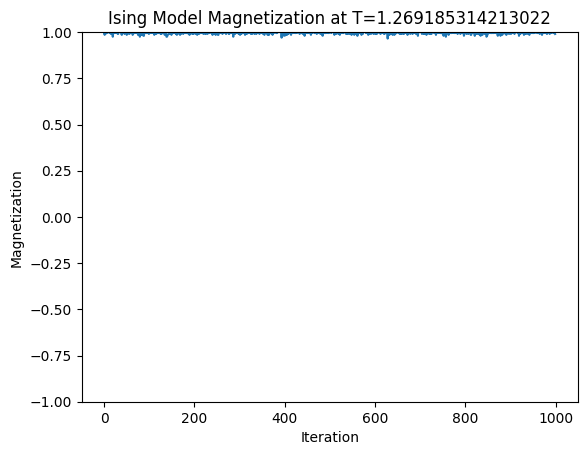

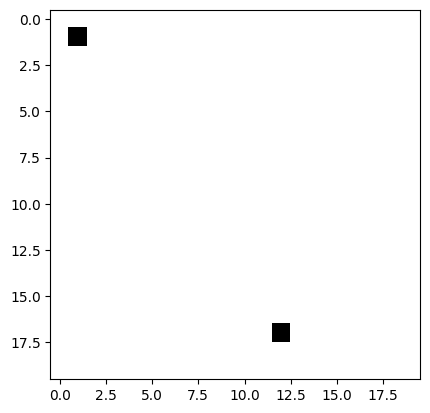

Burn-in: 0
Average magnetization after burn-in: 0.9954299999999998


In [37]:
T = Tc - 1 # Magnetized phase
N = 1000

model = IsingModel_Gibbs(L, T, random=False)
M = model.simulate_constant_T(N)

plt.plot(M)
plt.xlabel("Iteration")
plt.ylabel("Magnetization")
plt.title(f"Ising Model Magnetization at T={T}")
plt.ylim(-1, 1)
plt.show()
model.plot_lattice()

burn_in = np.argmax(np.abs(M) > 0.98)
print(f"Burn-in: {burn_in}")
print(f"Average magnetization after burn-in: {np.mean(M[burn_in:])}")




## Test 2: Just below critical temperature

Repeat the above experiment, but this time with temperature just below the critical temperature. The domain should still be magnetized, but the magnetization should be lower than in the previous case. Don't forget to reinitialize the grid to all spins up and find the burn-in period for this temperature.

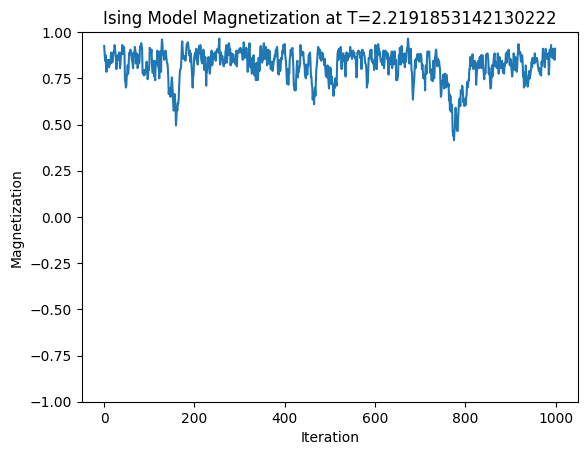

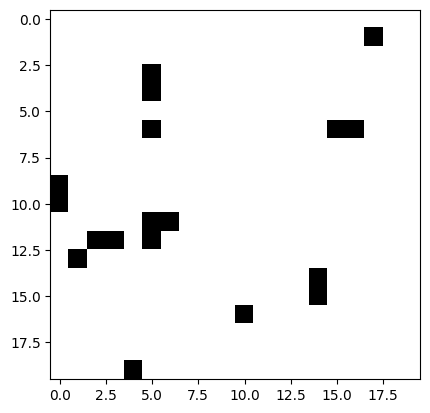

Burn-in: 0
Average magnetization after burn-in: 0.82205


In [30]:
T = Tc - 0.05 # Just below critical temperature
N = 1000

model = IsingModel_Gibbs(L, T, random=False)
M = model.simulate_constant_T(N)

plt.plot(M)
plt.xlabel("Iteration")
plt.ylabel("Magnetization")
plt.title(f"Ising Model Magnetization at T={T}")
plt.ylim(-1, 1)
plt.show()
model.plot_lattice()

burn_in = np.argmax(np.abs(M) > 0.90)
print(f"Burn-in: {burn_in}")
print(f"Average magnetization after burn-in: {np.mean(M[burn_in:])}")

## Test 3: Just above critical temperature

Repeat the above experiment, but this time with temperature just above the critical temperature. 

You might find that the magnetization is not stable. In this case, Gibbs sampling is taking too long to converge and the results are not reliable. Try increasing the number of steps to see if the magnetization stabilizes but be aware that this might take a long time or might not happen at all in any reasonable amount of time.

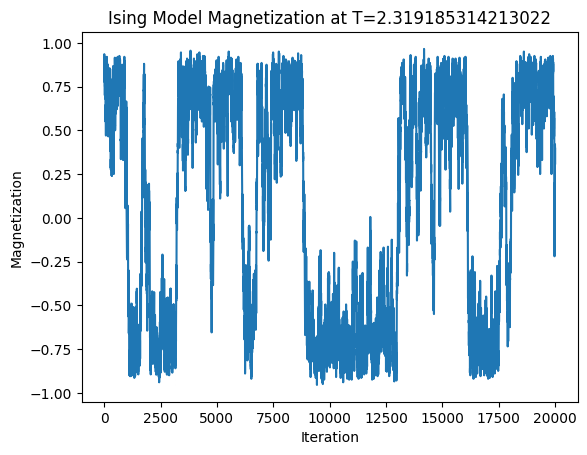

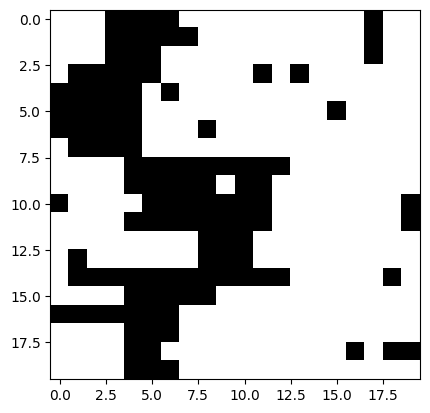

Burn-in: 0
Average magnetization after burn-in: 0.07696775


In [26]:
T = Tc + 0.05 # Just above critical temperature
N = 20000 # More samples needed as the system is close to critical temperature

model = IsingModel_Gibbs(L, T, random=False)
M = model.simulate_constant_T(N)

plt.plot(M)
plt.xlabel("Iteration")
plt.ylabel("Magnetization")
plt.title(f"Ising Model Magnetization at T={T}")
plt.show()
model.plot_lattice()

burn_in = np.argmax(np.abs(M) > 0.90)
print(f"Burn-in: {burn_in}")
print(f"Average magnetization after burn-in: {np.mean(M[burn_in:])}")

## Test 4: Non-magnetized domain

Finally, repeat the above experiment with a non-magnetized domain. This time, initialize the grid with random spins as we expect the system to converge to a non-magnetized state. Again, find the burn-in period before analyzing the magnetization of the system.

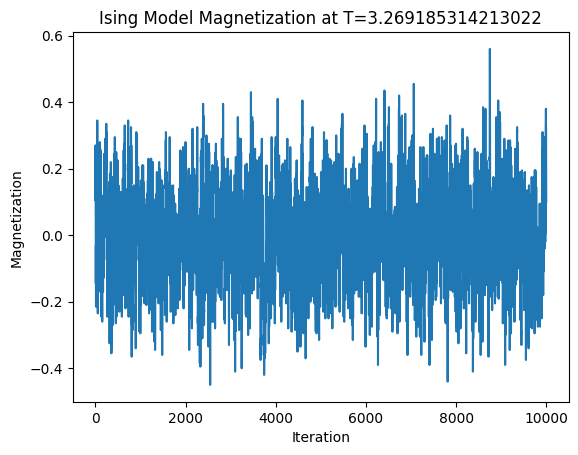

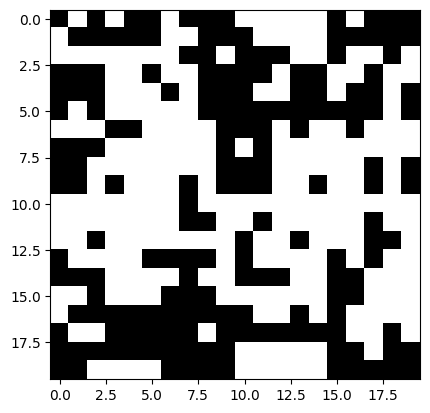

Burn-in: 0
Average magnetization after burn-in: -0.0011619999999999998


In [27]:
T = Tc + 1 # Above critical temperature
N = 10000

model = IsingModel_Gibbs(L, T, random=True)
M = model.simulate_constant_T(N)

plt.plot(M)
plt.xlabel("Iteration")
plt.ylabel("Magnetization")
plt.title(f"Ising Model Magnetization at T={T}")
plt.show()
model.plot_lattice()

burn_in = np.argmax(np.abs(M) > 0.90)
print(f"Burn-in: {burn_in}")
print(f"Average magnetization after burn-in: {np.mean(M[burn_in:])}")

## Test 5: Heating

Finally, start your simulation in a magnetized domain, but this time increase the temperature during the simulation. You should see the magnetization suddenly change near the critical temperature. 

Plot the **average** magnetization as a function of **temperature**. 

There is no need to burn in the simulation for this test. Also, initialize the grid with all spins up at the start but don't reinitialize the grid when changing the temperature as the system should already be close to the equilibrium state if we increase the temperature slowly.

Be patient, this will take longer to run than the previous simulations. You might want to test this with a smaller number of steps first to make sure your code is working correctly. If your computer is unable to run this simulation in a reasonable amount of time, you can reduce $N$ to whatever value is necessary to make the simulation run in a reasonable amount of time.

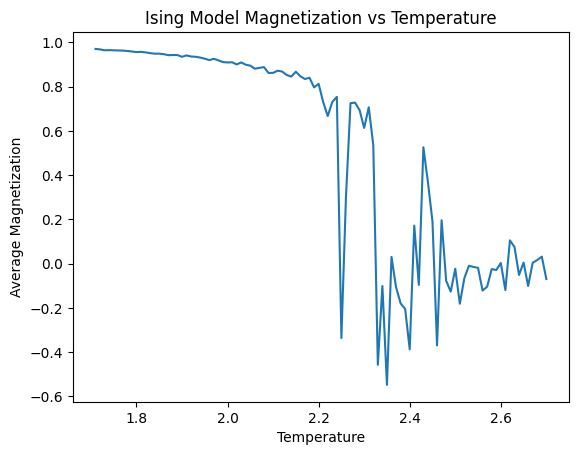

In [28]:
T_start = 1.71  # Initial temperature
T_end = 2.7  # Final temperature
steps = 100  # Number of temperatures to sample
N = 1000 # Number of samples to collect at each temperature

model = IsingModel_Gibbs(L, T, random=False)
M = model.simulate_T_range(T_start, T_end, steps, burn_in=0, N=N)

plt.plot(list(M.keys()), list(M.values()))
plt.xlabel("Temperature")
plt.ylabel("Average Magnetization")
plt.title("Ising Model Magnetization vs Temperature")
plt.show()
